<a href="https://colab.research.google.com/github/sandipbnkr/DemoCodeNucleus/blob/main/Loan_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("/content/loan_data.csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [6]:
df.shape

(381, 13)

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [8]:
df.duplicated().sum()

0

No duplicate value

In [11]:
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
df.dropna(inplace=True,axis=0)
#deleted nan value column

In [16]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
# Drop Unnecessary Columns
df.drop('Loan_ID', axis=1, inplace=True)

In [18]:
df.shape

(308, 12)

In [20]:
df['Loan_Status'].unique()

array(['N', 'Y'], dtype=object)

In [21]:
df['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [22]:
df['Dependents'] = df['Dependents'].replace(['0', '1', '2', '3+'], [0,1,2,3])

In [23]:
df['Dependents'].unique()

array([1, 0, 2, 3])

In [24]:
df['Loan_Status'] = df['Loan_Status'].replace(['Y','N'], [1,0])

In [25]:
df['Loan_Status'].unique()

array([0, 1])

In [27]:
df.dtypes

Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [28]:
df['Credit_History'] = df['Credit_History'].astype(int)

In [29]:
c_variable= ['Gender' ,'Married' ,'Education' ,'Self_Employed' ,'Loan_Status']
for i in c_variable:
    unique_value= df[i].unique()
    df[i].replace(unique_value ,[0,1] , inplace = True)

In [ ]:
typedf=df.columns
for i in typedf:
  print(df[i].unique())
  #displaying unique values

In [34]:
df['Education'].unique()

array([0, 1])

In [35]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1,0,0,4583,1508.0,128.0,360.0,1,Rural,0
1,0,0,0,0,1,3000,0.0,66.0,360.0,1,Urban,1
2,0,0,0,1,0,2583,2358.0,120.0,360.0,1,Urban,1
3,0,1,0,0,0,6000,0.0,141.0,360.0,1,Urban,1
4,0,0,0,1,0,2333,1516.0,95.0,360.0,1,Urban,1


In [36]:
df['Property_Area'].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [39]:
    unique_value= df['Property_Area'].unique()
    df['Property_Area'].replace(unique_value ,[0,1,2] , inplace = True)

In [40]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1,0,0,4583,1508.0,128.0,360.0,1,0,0
1,0,0,0,0,1,3000,0.0,66.0,360.0,1,1,1
2,0,0,0,1,0,2583,2358.0,120.0,360.0,1,1,1
3,0,1,0,0,0,6000,0.0,141.0,360.0,1,1,1
4,0,0,0,1,0,2333,1516.0,95.0,360.0,1,1,1


In [41]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [43]:
#now data is clean
#lets standardize
# Initialize the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
maxcolumns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']
# Loop through numerical columns, normalize, and update the DataFrame
for column in maxcolumns:
    df[column] = scaler.fit_transform(df[[column]])

In [44]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1,0,0,0.464043,0.044567,0.843972,0.72973,1,0,0
1,0,0,0,0,1,0.298336,0.000000,0.404255,0.72973,1,1,1
2,0,0,0,1,0,0.254684,0.069687,0.787234,0.72973,1,1,1
3,0,1,0,0,0,0.612373,0.000000,0.936170,0.72973,1,1,1
4,0,0,0,1,0,0.228515,0.044803,0.609929,0.72973,1,1,1


<Axes: >

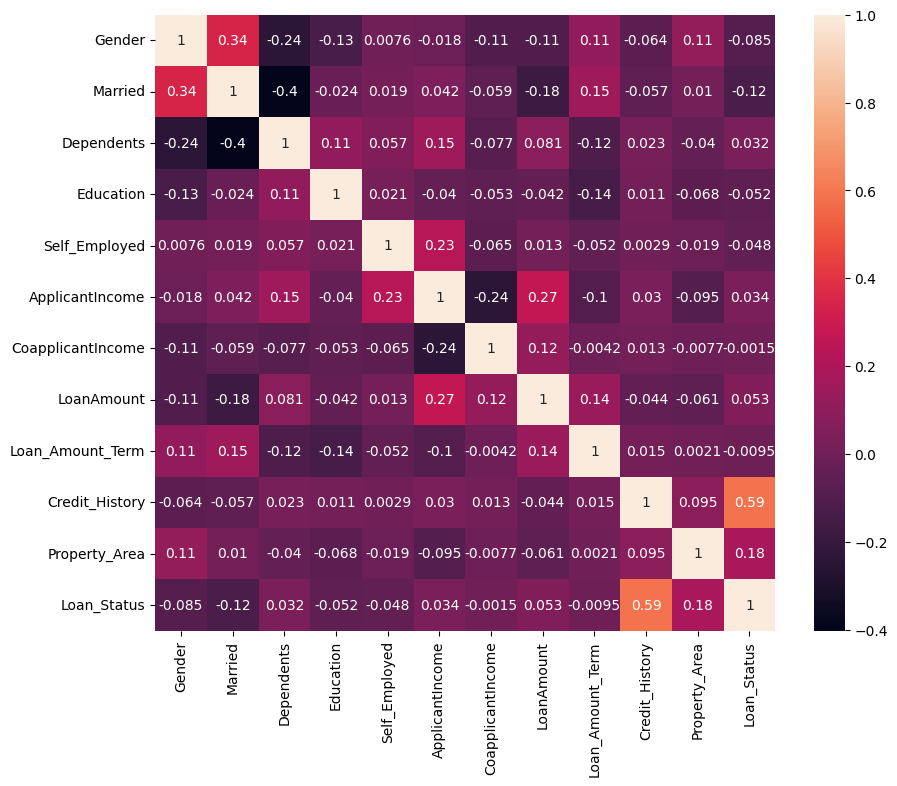

In [46]:
import seaborn as sns
plt.figure(figsize=(10,8))
corr_df = df.corr()
sns.heatmap(corr_df,annot=True)

In [66]:
#now our data is ready to use
#lets split now
from sklearn.model_selection import train_test_split
x= df.drop(['Loan_Status'] , axis=1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(x_new,y,train_size=0.8,random_state=0)


In [48]:
print(x.shape)
print(y.shape)

(308, 11)
(308,)


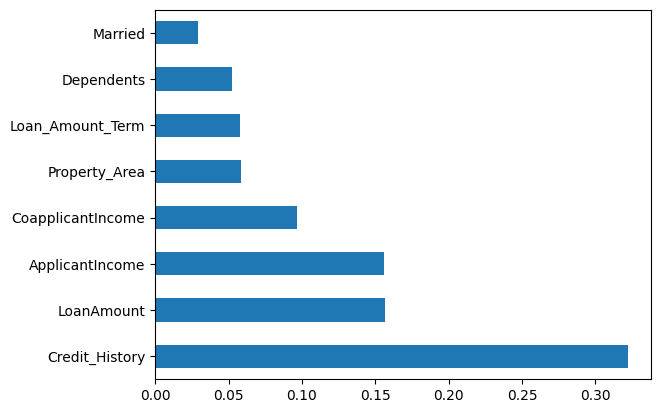

In [63]:
# Fit the ExtraTreesClassifier model
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x, y)

# Plot feature importances
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

In [65]:
selected_features = feat_importances.nlargest(8).index

# Create X_new with only the selected important features using .loc
x_new = df.loc[:, selected_features].copy()

x_new.head()

,Credit_History,LoanAmount,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Amount_Term,Dependents,Married
0,1,0.843972,0.464043,0.044567,0,0.72973,1,0
1,1,0.404255,0.298336,0.000000,1,0.72973,0,0
2,1,0.787234,0.254684,0.069687,1,0.72973,0,0
3,1,0.936170,0.612373,0.000000,1,0.72973,0,1
4,1,0.609929,0.228515,0.044803,1,0.72973,0,0


In [56]:
RF_params = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider at every split
    'bootstrap': [True, False]  # Method of selecting samples for training each tree
}

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
random_forest = RandomForestClassifier()

RF_random_search = RandomizedSearchCV(random_forest, param_distributions=RF_params, n_iter=5, scoring='roc_auc', n_jobs=-1, cv=5, verbose=3)
RF_random_search.fit(X_train, y_train)

y_pred = RF_random_search.predict(X_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [68]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[10,  6],
       [ 6, 40]])

In [69]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8064516129032258